In [2]:
import pandas as pd
import re
from sklearn.preprocessing import LabelEncoder
from trainer import training_model

PATH = 'candidate_priority.csv'

In [3]:
def strip_and_capitalize(value):
    value = str(value).strip()
    value = value.lower().capitalize()
    return value

def parse_years_exp(col):
    regex = r'^(\d+)[\-–](\d+)$'
    def convert(value):
        value = str(value).strip()
        if value.endswith('+'):
            return int(value.replace('+', ''))
        m = re.match(regex, value)
        if m:
            v1 = int(m.group(1))
            v2 = int(m.group(2))
            return (v1 + v2) / 2
    return col.apply(convert)

In [4]:
def parse_skills_coverage(col):
    mapp = {
        'Low': 0,
        'Medium': 1,
        'High': 2
    }
    def convert(value):
        value = strip_and_capitalize(value)
        for key, v in mapp.items():
            if key == value:
                return v
    return col.apply(convert)
        

def parse_referral_flag(col):
    def convert(value):
        return int(value)
    return col.apply(convert)

In [5]:
def parse_english_level(col):
    le = LabelEncoder()
    s = []
    for value in col:
        value = strip_and_capitalize(value)
        s.append(value)
    encoded = le.fit_transform(s)
    return encoded


def parse_location_match(col):
    le = LabelEncoder()
    s = []
    for value in col:
        value = strip_and_capitalize(value)
        if value == 'Remoteok':
            value = 'RemoteOK'
        s.append(value)
    encoded = le.fit_transform(s)
    return encoded


def parse_priority(col):
    s = []
    for value in col:
        value = strip_and_capitalize(value)
        s.append(value)
    return s

In [13]:
data = pd.read_csv(PATH)
data.head()

,id,years_exp_band,skills_coverage_band,referral_flag,english_level,location_match,priority
0,CPD0000,3-6,Medium,0.0,NaN,Local,Med
1,CPD0001,3-6,low,0.0,A2,RemoteOK,Low
2,CPD0002,0-1,Low,1.0,B2,RemoteOK,Low
3,CPD0003,1-3,Medium,0.0,C1,RemoteOK,Med
4,CPD0004,1-3,High,0.0,B2,Local,High


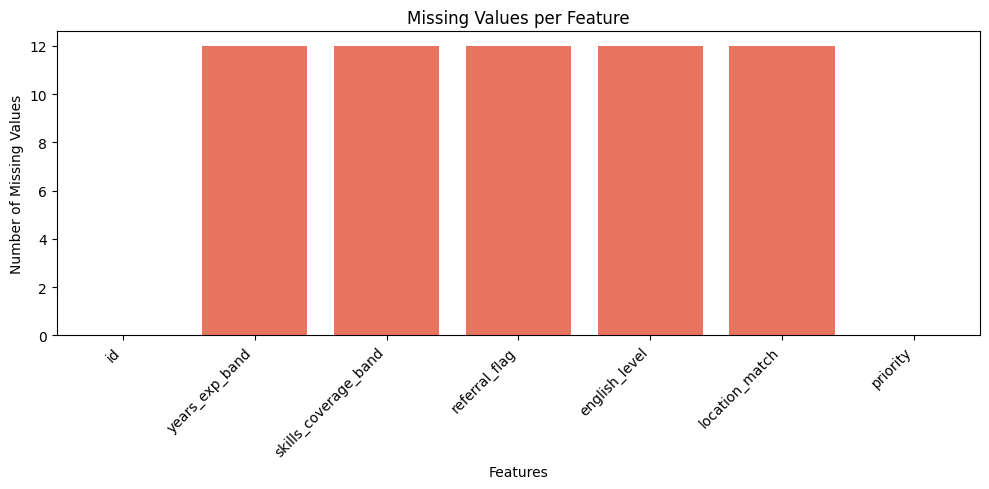

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

missing = data.isnull().sum()

plt.figure(figsize=(10, 5))
sns.barplot(x=missing.index, y=missing.values, color='tomato')
plt.title("Missing Values per Feature")
plt.xlabel("Features")
plt.ylabel("Number of Missing Values")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


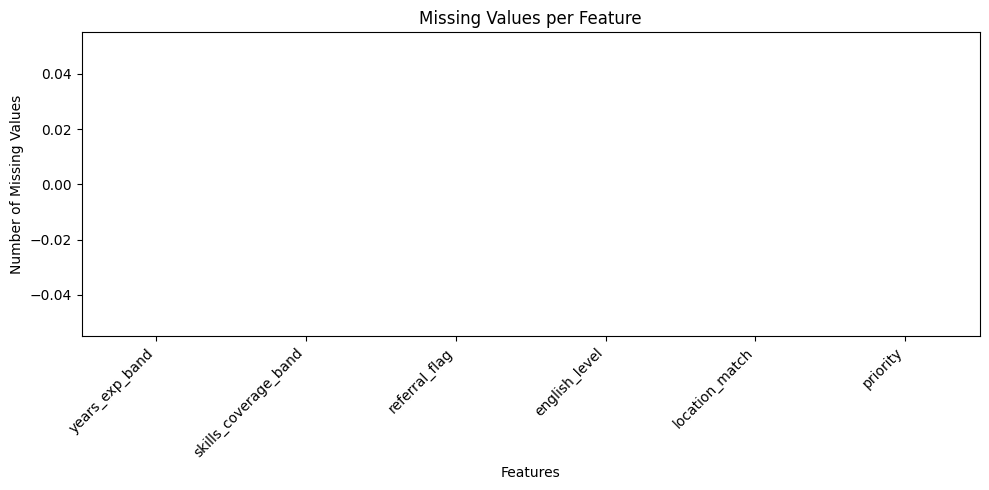

In [ ]:
saved_data = data.copy()
saved_data = saved_data.dropna()
saved_data = saved_data.drop('id', axis=1)
missing_new = saved_data.isnull().sum()
plt.figure(figsize=(10, 5))
sns.barplot(x=missing_new.index, y=missing_new.values, color='tomato')
plt.title("Missing Values per Feature")
plt.xlabel("Features")
plt.ylabel("Number of Missing Values")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
saved_data['years_exp_band'] = parse_years_exp(saved_data['years_exp_band'])
saved_data['skills_coverage_band'] = parse_skills_coverage(saved_data['skills_coverage_band'])
saved_data['referral_flag'] = parse_referral_flag(saved_data['referral_flag'])
saved_data['english_level'] = parse_english_level(saved_data['english_level'])
saved_data['location_match'] = parse_location_match(saved_data['location_match'])
saved_data['priority'] = parse_priority(saved_data['priority'])
print(saved_data.head())

   years_exp_band  skills_coverage_band  referral_flag  english_level  \
1             4.5                     0              0              0   
2             0.5                     0              1              2   
3             2.0                     1              0              3   
4             2.0                     2              0              2   
5             0.5                     2              0              1   

   location_match priority  
1               2      Low  
2               2      Low  
3               2      Med  
4               0     High  
5               1      Low  


C:\Users\legende\AppData\Local\Temp\ipykernel_1484\1952607712.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=saved_data, x="priority", palette="pastel")


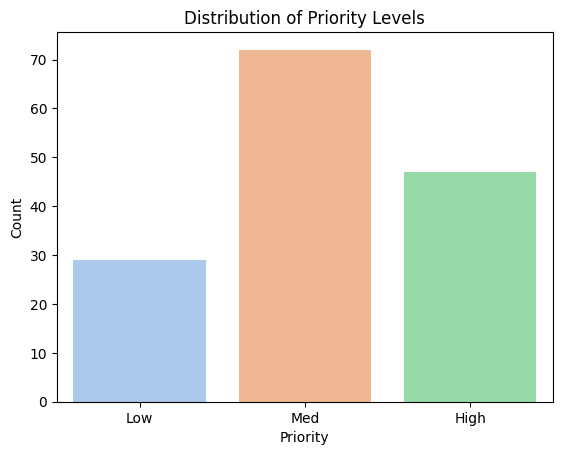

In [ ]:
sns.countplot(data=saved_data, x="priority", palette="pastel")
plt.title("Distribution of Priority Levels")
plt.xlabel("Priority")
plt.ylabel("Count")
plt.show()


In [ ]:
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X = saved_data.drop('priority', axis=1)
y = saved_data['priority']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", round(accuracy, 3))



Model Accuracy: 0.8
